/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


importing Jupyter notebook from Algorithm/Demo/Demo.ipynb


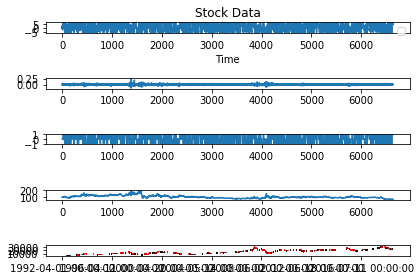

In [2]:
import Ipynb_importer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as datetime
from mpl_finance import candlestick2_ohlc

from Algorithm.Demo import Demo as IW

returns = pd.read_excel('Data/stock_data.xlsx', sheet_name='Sheet2', index_col=0)
date = pd.read_excel('Data/stock_data.xlsx', sheet_name='Sheet2')


plt.figure(1)

#print(date)

plt.subplot(511)
#returns.plot()
plt.title('Stock Data')
plt.xlabel('Time')
plt.legend(loc=0)
  
oiw = IW.Model(returns)
score, cap, cap_daily_p, position = oiw.Core()
plt.plot(score)
plt.subplot(512)
plt.plot(cap_daily_p)
plt.subplot(513)
plt.plot(position)
plt.subplot(514)
plt.plot(cap)





In [2]:
cap.append(0)
score.append(0)
px_last = returns['PX_LAST']
print len(score), len(position), len(px_last)

6639 6639 6639


In [3]:
ex = pd.DataFrame({'Score': score, 'Capital': cap, 'Last_Price': px_last, 'Position': position, 'Daily %': cap_daily_p})

4.67648253452
0.875252841626


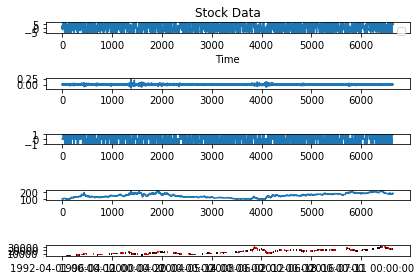

In [4]:
ex.to_excel('Data/export_TS.xlsx', sheet_name='export')

'''
plt.subplot(311)
prices = pd.read_excel('stock_data.xlsx', sheet_name=2, index_col=0, usecols="A,B,C,D,E")
#prices.plot()
plt.title('Prices')
plt.xlabel('Time')
plt.legend(loc=0)
plt.plot(prices)

plt.subplot(312)
bb = pd.read_excel('stock_data.xlsx', sheet_name=2, index_col=0, usecols="A,B,E,M,N,O")
#bb.plot()
plt.title('BB')
plt.xlabel('Time')
plt.legend(loc=0)
plt.plot(bb)
'''

print float(returns['PX_LAST'][-1]) / float(returns['PX_LAST'][0]) - 1.
print cap[-2] / cap[0] - 1.

ax = plt.subplot(515)
candlestick2_ohlc(ax, returns['PX_OPEN'], returns['PX_HIGH'], returns['PX_LOW'], returns['PX_LAST'], width=0.3)
xdate = returns.index

#ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

def mydate(x, pos) :
    try:
        return xdate[int(x)]
    except IndexError:
        return ''
    
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))


plt.tight_layout()
plt.show()